## Применение однослойной нейронной сети для решения задач регрессии экспериментальных данных


In [58]:
from services import *
from variants import *
import numpy as np
from copy import copy
import matplotlib.pyplot as plt


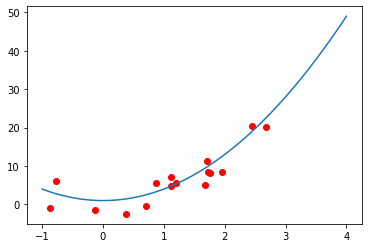

In [59]:
N = 16
x_start = -1
x_end = 3
c = 3
d = 1

x_points = np.random.uniform(low=x_start, high=x_end, size=N)
A = np.random.normal(scale=3, size=x_points.size)
y_points = c * x_points ** 2 + d + A
true_c, true_d = mnk(list(zip(x_points, y_points)))

true_x = np.linspace(-1, 4, 100)
true_y = c * true_x ** 2 + d

plt.plot(true_x, true_y)
plt.scatter(x_points, y_points, c='red')


IndexError: tuple index out of range

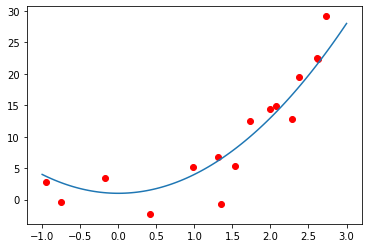

In [60]:
data = []
epochs = 10
epoch_output = []
a = -1
b = 3
c = 3.0
d = 1.0
N = 16
A = 3

x_points = np.random.uniform(low=a, high=b, size=N)
rA = np.random.normal(scale=A, size=x_points.size)
y_points = c * x_points ** 2 + d + rA
expected_output = mnk(list(zip(x_points, y_points)))

true_x = np.linspace(a, b, 100)
true_y = c * true_x ** 2 + d

plt.plot(true_x, true_y)
plt.scatter(x_points, y_points, c='red')

nn = NeuralNetwork(learning_rate=0.1, activation_function=af, derivative_function=df, c=c, d=d)


for i in range(epochs):
    current_weights = copy(nn.weights)
    nn.epoch(input_data=y_points, expected_output_data=expected_output)
    x = np.linspace(a, b, 100)
    y = c * true_x ** 2 + d
    plt.plot(x, y)